<a href="https://colab.research.google.com/github/SLKS99/Understanding-the-Ligand-Assisted-Reprecipitation-of-CsPbBr3-Perovskite-Nanocrystals-via-High-Throug/blob/main/4_7_23_SHAP_CsPbBr3_on_peak_position.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

from sklearn.neural_network import MLPRegressor
import sklearn


import time



from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title Data Information

#Name of files 
data_file_name = 'Trial dataset CsPbBr3.csv' #@param {type:'string'}
composition_file_name = 'CsPbBr3 wells.csv' #@param {type:'string'}

#Download the correct data
data_file = '1VYFlEvvFQgiyNIN-xlAepYpOlGaMVc6q' #@param {type:"string"}
composition_file = '1inVFp-FtwBxsHCaDJRrarAAshRtmyFV6' #@param {type:"string"}

In [ ]:
#@title Download Files

!gdown https://drive.google.com/uc?id={data_file}

!gdown https://drive.google.com/uc?id={composition_file}

Downloading...
From: https://drive.google.com/uc?id=1VYFlEvvFQgiyNIN-xlAepYpOlGaMVc6q
To: /content/Trial dataset CsPbBr3.csv
100% 6.71k/6.71k [00:00<00:00, 8.01MB/s]
Downloading...
From: https://drive.google.com/uc?id=1inVFp-FtwBxsHCaDJRrarAAshRtmyFV6
To: /content/CsPbBr3 wells.csv
100% 1.08k/1.08k [00:00<00:00, 1.29MB/s]


In [ ]:
#@title Into Pandas Dataframes
rawData = pd.read_csv(data_file_name)

composition = pd.read_csv(composition_file_name, index_col = 0)

display(rawData)

,OAc,OLAm,PbBr2,Cs,Ligand Ratio,OctAc,OctAm,Toluene,Chloroform,Output
0,100,10,300,100,11,0,0,100,0,522.613711
1,100,20,300,100,12,0,0,100,0,522.321979
2,100,30,300,100,13,0,0,100,0,523.150354
3,100,40,300,100,14,0,0,100,0,520.040419
4,100,50,300,100,15,0,0,100,0,517.771132
...,...,...,...,...,...,...,...,...,...,...
155,100,160,200,100,26,0,0,0,100,484.178990
156,100,170,200,100,27,0,0,0,100,487.291796
157,100,180,200,100,28,0,0,0,100,485.877472
158,100,190,200,100,29,0,0,0,100,483.884633


In [ ]:

plt.rcParams["font.size"] = "20"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"
plt.rcParams['axes.titleweight']='bold'

In [ ]:
X = rawData.iloc[:,:-1]
Y = rawData.iloc[:,-1]

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


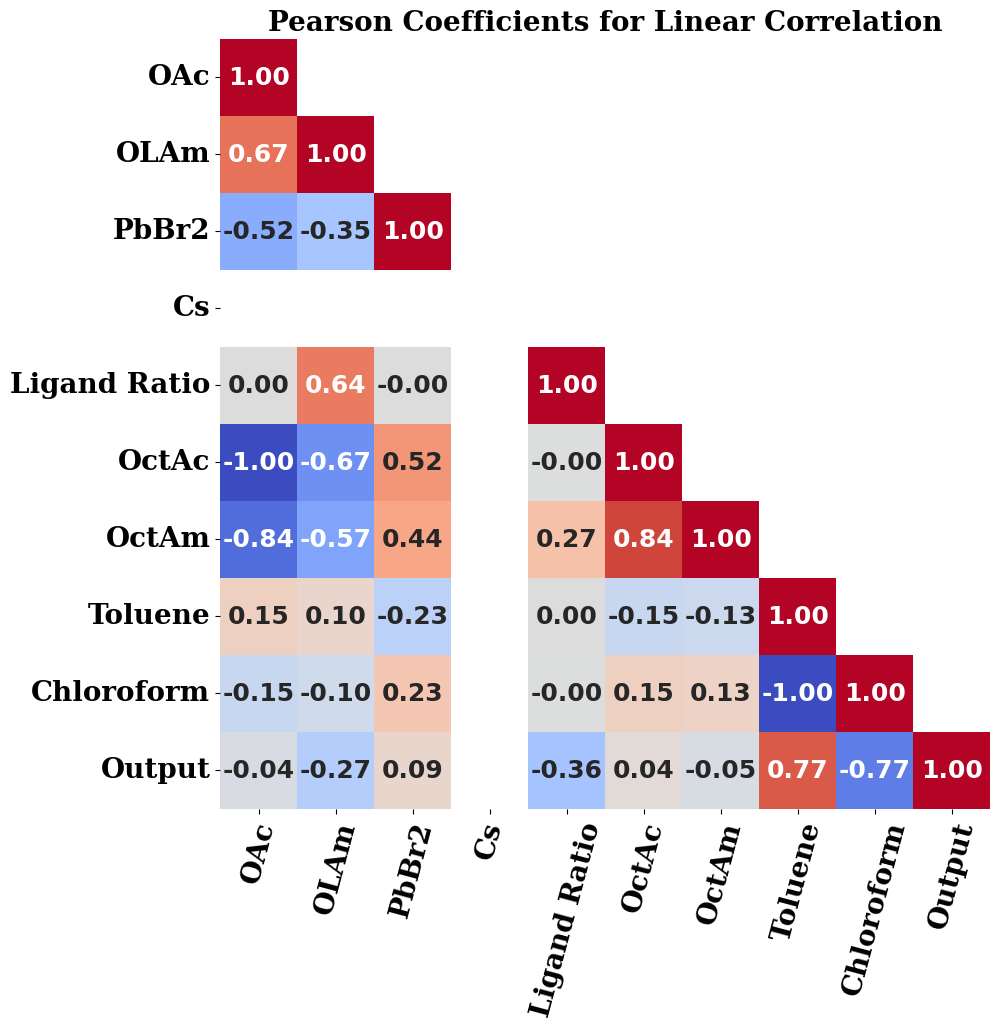

In [ ]:
# Correlation coefficient matrix
corr = rawData.corr(method='pearson')
corr.columns = rawData.columns
rawData_len = len(rawData.columns)
fs = 20
fig, ax=plt.subplots(figsize=(rawData_len,rawData_len))
sns.set(font_scale=1.5)
sns.set_style("ticks",{'xtick.direction': 'in', # set the style of the plot using seaborn
                       'ytick.direction':'in',
                       'xtick.top': False,'ytick.right': False})
mask = np.triu(np.ones_like(corr, dtype=np.bool),k=1)
cmap = plt.get_cmap('coolwarm')
sns.heatmap(corr,  cbar_kws={"shrink": .2}, annot=True, fmt='.2f', 
            cmap=cmap, cbar=False, ax=ax, square=True,mask=mask)

ax.set_title("Pearson Coefficients for Linear Correlation", fontsize = 20)
plt.xticks(rotation=75, fontsize = fs)
plt.yticks(rotation=0, fontsize = fs) 
plt.show()

In [ ]:
Y

0      522.613711
1      522.321979
2      523.150354
3      520.040419
4      517.771132
          ...    
155    484.178990
156    487.291796
157    485.877472
158    483.884633
159    488.748110
Name: Output, Length: 160, dtype: float64

In [ ]:
scaler=StandardScaler(
)

X_normalized= scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


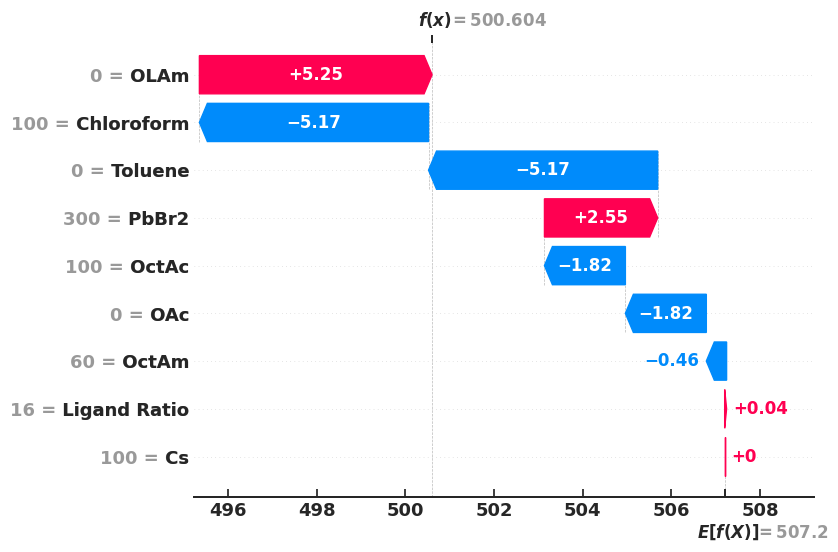

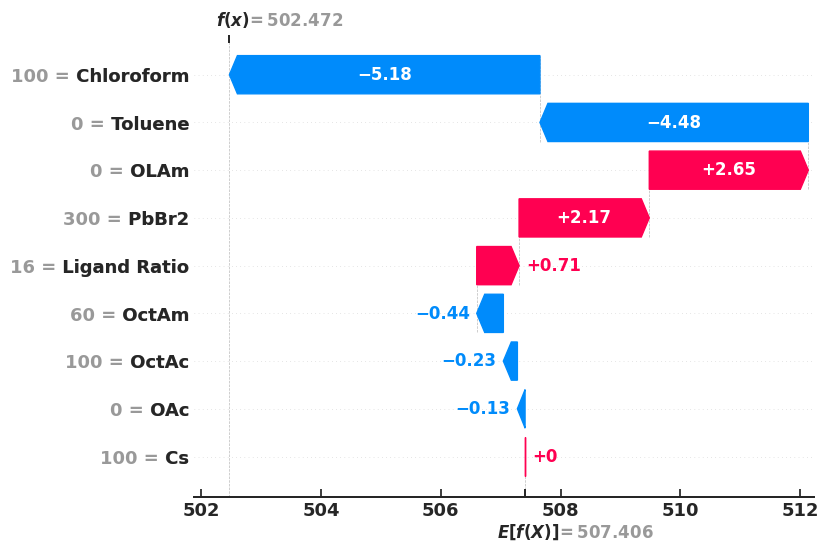

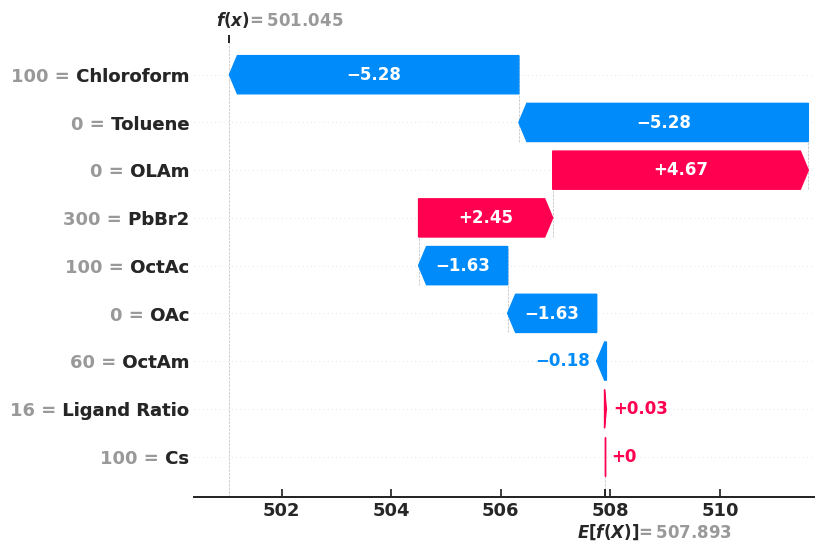

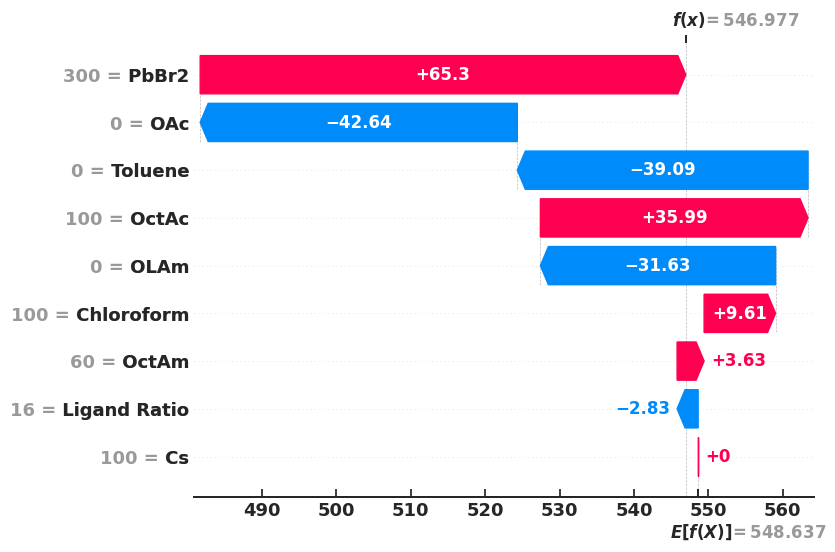

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the six machine learning models
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators= 100, min_samples_split= 5, min_samples_leaf= 1, max_depth= 10)
svm_reg = SVR(kernel='linear')
nn_reg = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)


# Train the six models on the training data
lin_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
svm_reg.fit(X_train, y_train)
nn_reg.fit(X_train, y_train)


# Calculate SHAP values for the test data using each model
explainer_lin_reg = shap.Explainer(lin_reg.predict, X_train)
shap_values_lin_reg = explainer_lin_reg(X_test)

explainer_rf_reg = shap.Explainer(rf_reg.predict, X_train)
shap_values_rf_reg = explainer_rf_reg(X_test)

explainer_svm_reg = shap.Explainer(svm_reg.predict, X_train)
shap_values_svm_reg = explainer_svm_reg(X_test)

explainer_nn_reg = shap.Explainer(nn_reg.predict, X_train)
shap_values_nn_reg = explainer_nn_reg(X_test)


# Plot the SHAP values for a single example
shap.plots.waterfall(shap_values_lin_reg[0])
shap.plots.waterfall(shap_values_rf_reg[0])
shap.plots.waterfall(shap_values_svm_reg[0])
shap.plots.waterfall(shap_values_nn_reg[0])



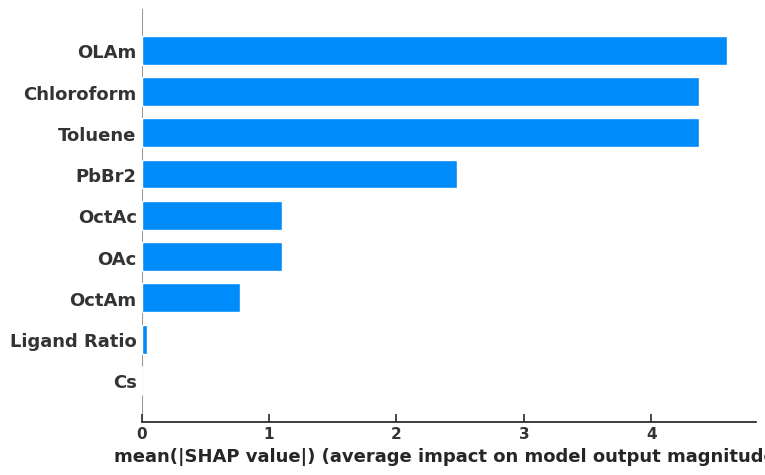

In [ ]:

plt.xlabel('Linear regressor coefficients')
shap.summary_plot(shap_values_lin_reg, X_test, plot_type="bar", show=False)


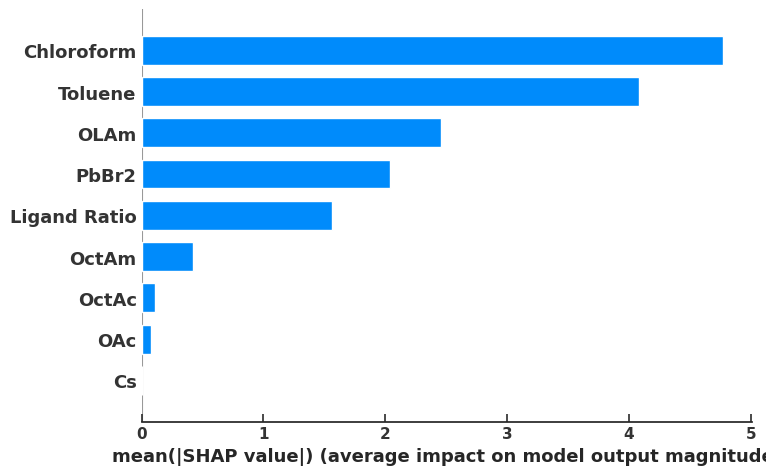

In [ ]:
shap.summary_plot(shap_values_rf_reg, X_test, plot_type="bar", show=False)


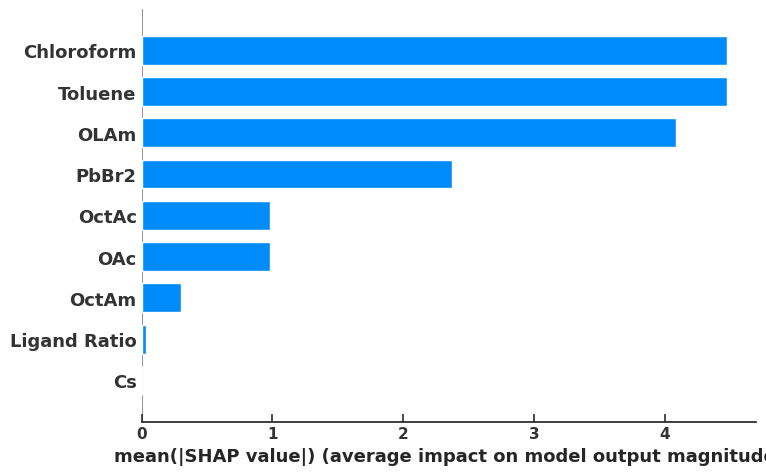

In [ ]:
shap.summary_plot(shap_values_svm_reg, X_test, plot_type="bar", show=False)


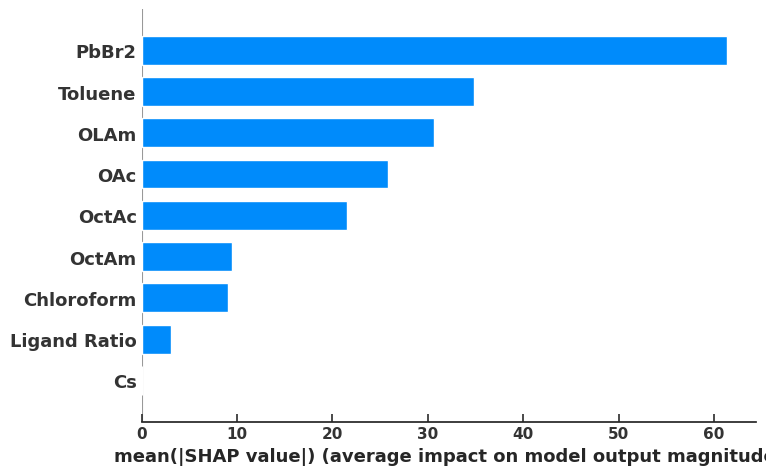

In [ ]:
shap.summary_plot(shap_values_nn_reg, X_test, plot_type="bar", show=False)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


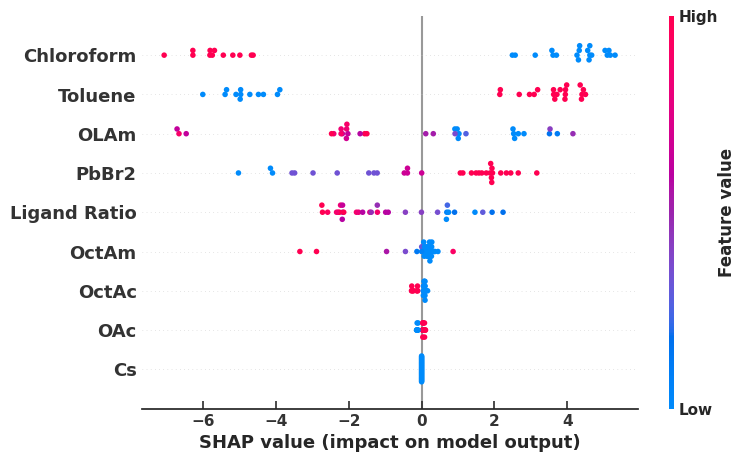

In [ ]:
#shap.plots.beeswarm(shap_values_lin_reg)
shap.plots.beeswarm(shap_values_rf_reg)
#shap.plots.beeswarm(shap_values_svm_reg)
#shap.plots.beeswarm(shap_values_nn_reg)




In [ ]:
# Assuming you have already defined your training and testing data X_train, Y_train, X_test, Y_test and model

# Make predictions on the test data
Y_pred =lin_reg .predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, Y_pred, squared=False)

print("Root Mean Squared Error: {}".format(rmse))

# Make predictions on the test data
Y_pred =rf_reg.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))

print("Root Mean Squared Error: {}".format(rmse))
# Make predictions on the test data
Y_pred =lin_reg .predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))

print("Root Mean Squared Error: {}".format(rmse))
# Make predictions on the test data
Y_pred =svm_reg .predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))

print("Root Mean Squared Error: {}".format(rmse))
# Make predictions on the test data
Y_pred =nn_reg.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))

print("Root Mean Squared Error: {}".format(rmse))


Root Mean Squared Error: 5.7407951893736575
Root Mean Squared Error: 4.863845159085488
Root Mean Squared Error: 5.7407951893736575
Root Mean Squared Error: 5.975608753264834
Root Mean Squared Error: 95.73792755484914


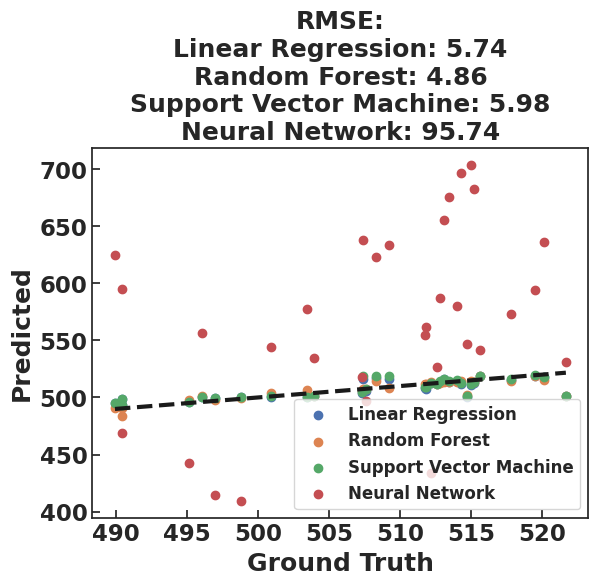

In [ ]:


# Make predictions on the test data for each model
lin_pred = lin_reg.predict(X_test)
rf_pred = rf_reg.predict(X_test)
svm_pred = svm_reg.predict(X_test)
nn_pred = nn_reg.predict(X_test)


# Calculate the RMSE for each model
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_pred))



# Plot the RMSE for the predicted vs ground truth values
fig, ax = plt.subplots()
ax.scatter(y_test, lin_pred, label='Linear Regression')
ax.scatter(y_test, rf_pred, label='Random Forest')
ax.scatter(y_test, svm_pred, label='Support Vector Machine')
ax.scatter(y_test, nn_pred, label='Neural Network')

ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
ax.set_xlabel('Ground Truth')
ax.set_ylabel('Predicted')
ax.set_title('RMSE:\nLinear Regression: {:.2f}\nRandom Forest: {:.2f}\nSupport Vector Machine: {:.2f}\nNeural Network: {:.2f}'.format(lin_rmse, rf_rmse, svm_rmse, nn_rmse))
ax.legend(fontsize=12)
plt.show()


In [ ]:

# Normalize the X data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Convert the normalized X data back to a dataframe with the original feature names
X_norm_df = pd.DataFrame(X_norm, columns=X.columns)


Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


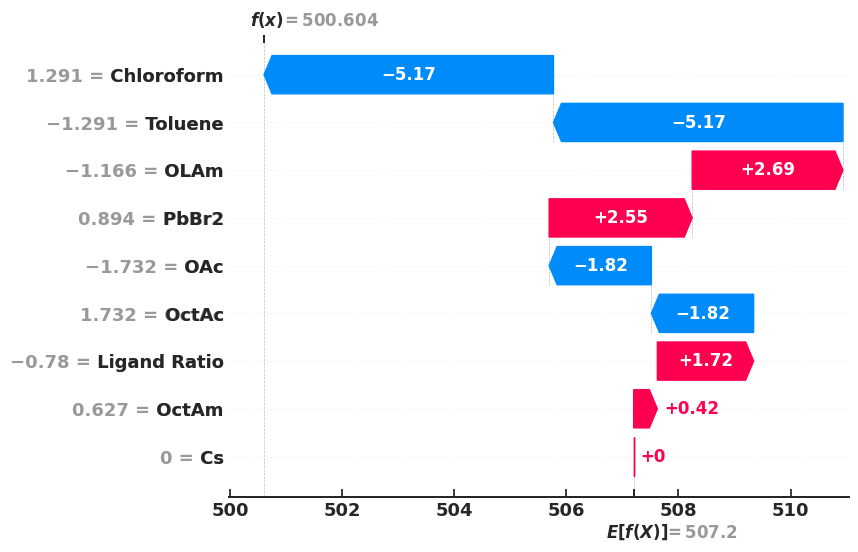

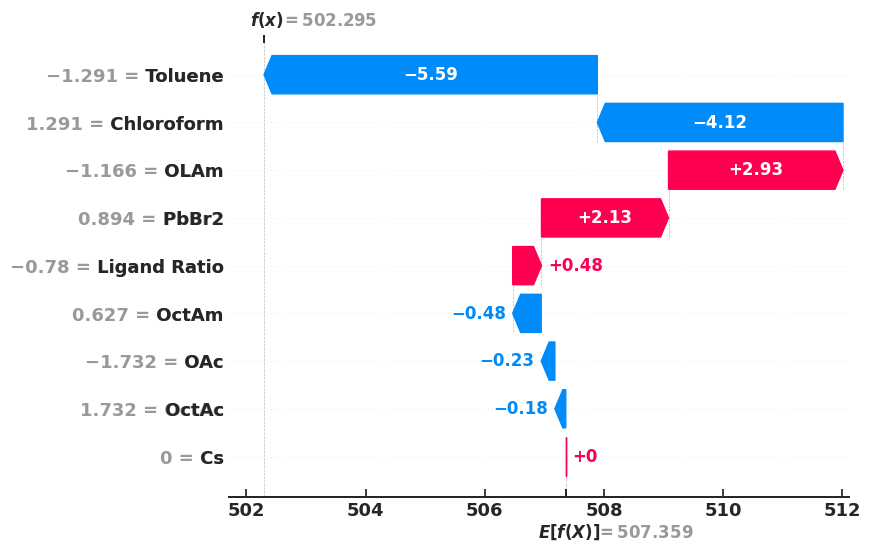

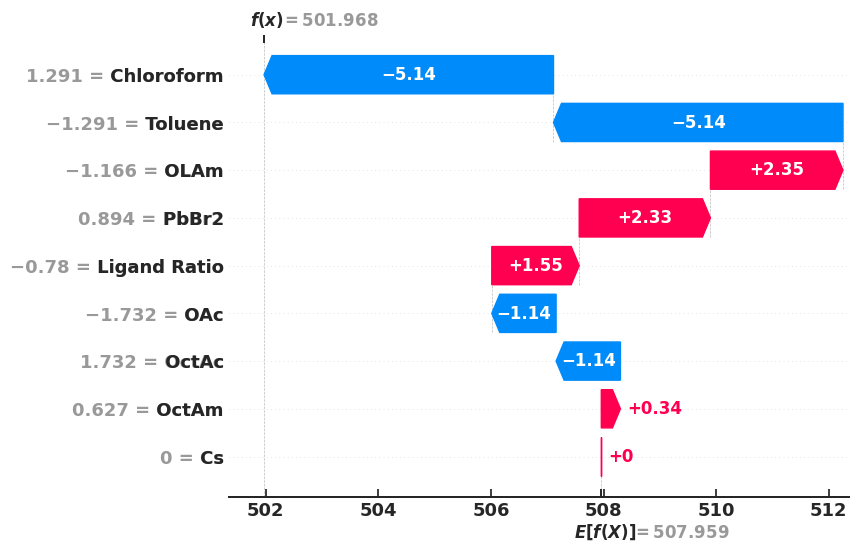

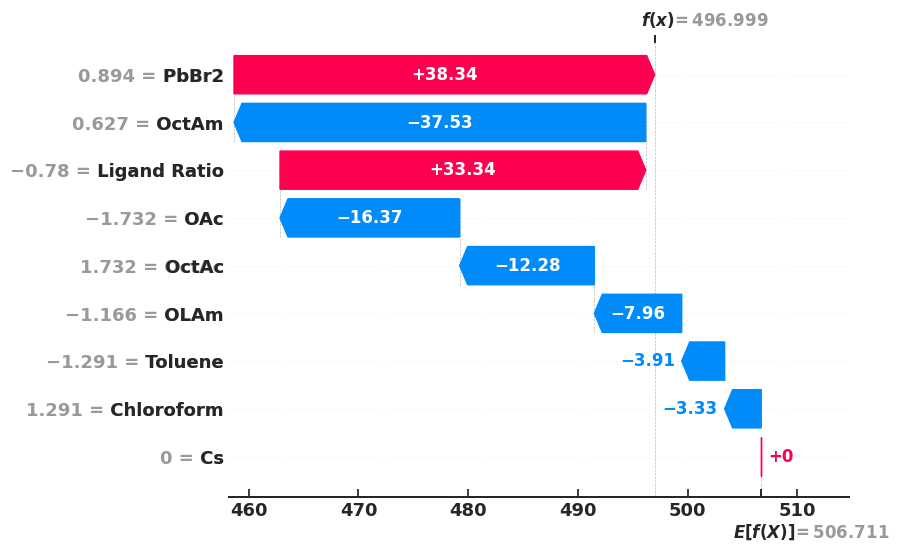

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm_df, Y, test_size=0.2, random_state=42)

# Define the six machine learning models
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators= 100, min_samples_split= 5, min_samples_leaf= 1, max_depth= 10)
svm_reg = SVR(kernel='linear')
nn_reg = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Train the six models on the training data
lin_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
svm_reg.fit(X_train, y_train)
nn_reg.fit(X_train, y_train)


# Calculate SHAP values for the test data using each model
explainer_lin_reg = shap.Explainer(lin_reg.predict, X_train)
shap_values_lin_reg = explainer_lin_reg(X_test)

explainer_rf_reg = shap.Explainer(rf_reg.predict, X_train)
shap_values_rf_reg = explainer_rf_reg(X_test)

explainer_svm_reg = shap.Explainer(svm_reg.predict, X_train)
shap_values_svm_reg = explainer_svm_reg(X_test)

explainer_nn_reg = shap.Explainer(nn_reg.predict, X_train)
shap_values_nn_reg = explainer_nn_reg(X_test)

# Plot the SHAP values for a single example
shap.plots.waterfall(shap_values_lin_reg[0])
shap.plots.waterfall(shap_values_rf_reg[0])
shap.plots.waterfall(shap_values_svm_reg[0])
shap.plots.waterfall(shap_values_nn_reg[0])



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


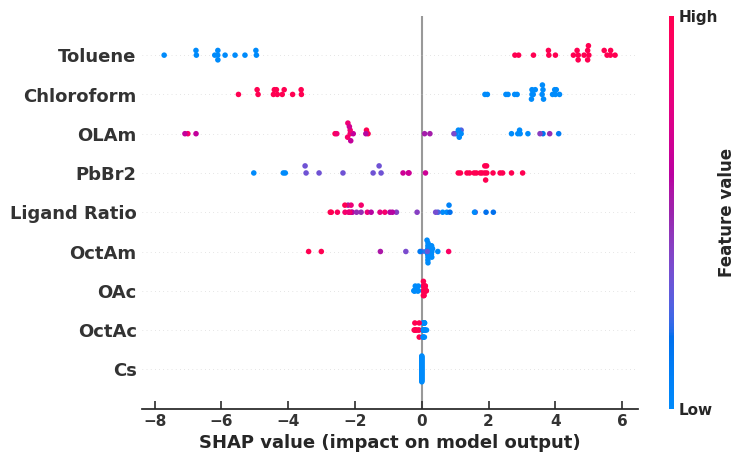

In [ ]:
#shap.plots.beeswarm(shap_values_lin_reg)
shap.plots.beeswarm(shap_values_rf_reg)
#shap.plots.beeswarm(shap_values_svm_reg)
#shap.plots.beeswarm(shap_values_nn_reg)



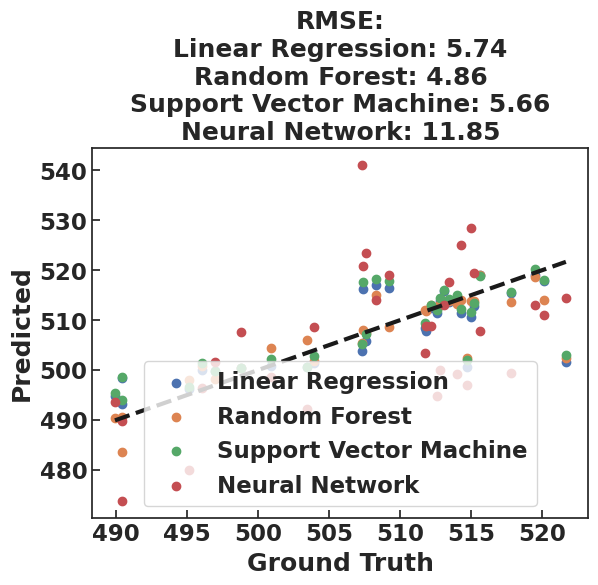

In [ ]:


# Make predictions on the test data for each model
lin_pred = lin_reg.predict(X_test)
rf_pred = rf_reg.predict(X_test)
svm_pred = svm_reg.predict(X_test)
nn_pred = nn_reg.predict(X_test)



# Calculate the RMSE for each model
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_pred))


# Plot the RMSE for the predicted vs ground truth values
fig, ax = plt.subplots()
ax.scatter(y_test, lin_pred, label='Linear Regression')
ax.scatter(y_test, rf_pred, label='Random Forest')
ax.scatter(y_test, svm_pred, label='Support Vector Machine')
ax.scatter(y_test, nn_pred, label='Neural Network')

ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
ax.set_xlabel('Ground Truth')
ax.set_ylabel('Predicted')
ax.set_title('RMSE:\nLinear Regression: {:.2f}\nRandom Forest: {:.2f}\nSupport Vector Machine: {:.2f}\nNeural Network: {:.2f}'.format(lin_rmse, rf_rmse, svm_rmse, nn_rmse))
ax.legend()
plt.show()
